In [3]:
import io
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
import warnings
warnings.filterwarnings('ignore')
DF=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [4]:
DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
DF.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
DF.shape

(891, 12)

In [7]:
DF.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Categorical:
Embarked, Sex,Survived

Ordinal:
PClass

Numeric
Age,Fare,Sibsp,Parch


In [8]:
DF.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Age, Cabin and Embarked which will need to be treated

From the dataset we could see that Passenger ID, Name and Cabin doesnt impact the survival rate.so they can be dropeed.

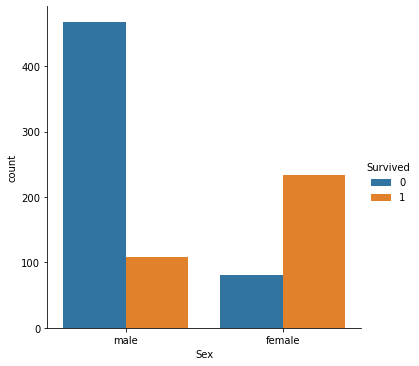

In [9]:
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = DF)

From this we could see that Female have survived more than Male

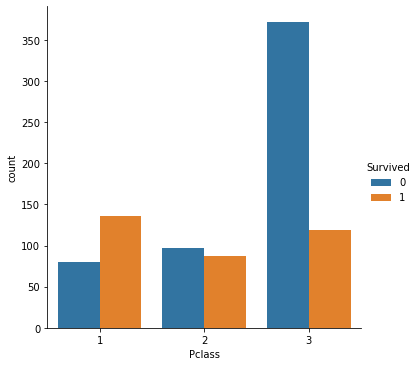

In [10]:
sns.catplot(x ="Pclass", hue ="Survived",kind ="count", data = DF)

From the above graph we can see that more People in Class 1 and 3 have survived than in class 2

# Treating Missing Values

<AxesSubplot:xlabel='Age', ylabel='Density'>

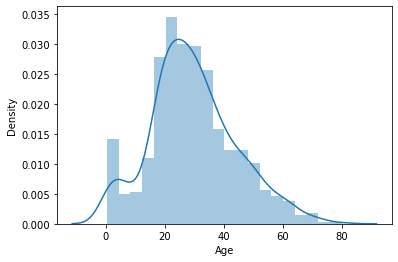

In [11]:
sns.distplot(DF["Age"])

In [12]:
DF["Age"].fillna(DF["Age"].median(),inplace=True)

In [13]:
DF["Embarked"].fillna(DF["Embarked"].mode()[0],inplace=True)

In [14]:
DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
DF.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missing Values are treated. As Cabin doesnot impact the target variable survival rate. we can drop the column and Age is treated with fill Median and Embarked as Categorical filled with Mode 

Dropping innecessary columns(Name,Passenger ID, Cabin) to avoid confusions

In [16]:
DF1=DF.drop(["PassengerId","Name","Cabin"],axis=1)

In [17]:
DF1.shape

(891, 9)

In [18]:
DF1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [19]:
DF1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [20]:
DF1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Density'>

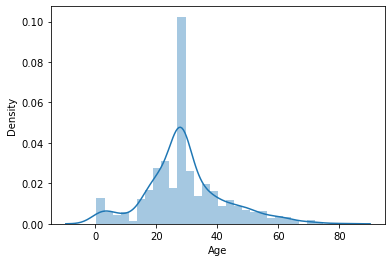

In [21]:
sns.distplot(DF1["Age"])

# Transforming Object to Numeric for ML to read ius

In [22]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in DF1.columns:
    if DF1[i].dtypes=="object":
        DF1[i]=enc.fit_transform(DF1[i].values.reshape(-1,1))
DF1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,28.0,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


# Checking Outliers

<AxesSubplot:xlabel='Age'>

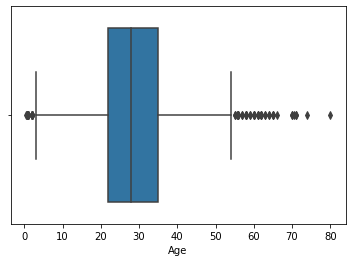

In [23]:
sns.boxplot(DF["Age"])

<AxesSubplot:xlabel='Fare'>

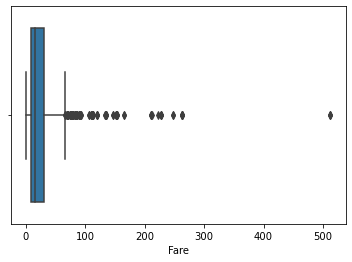

In [24]:
sns.boxplot(DF["Fare"])

In [25]:
from scipy.stats import zscore
z=zscore(DF1)
z


array([[-0.78927234,  0.82737724,  0.73769513, ...,  0.91896631,
        -0.50244517,  0.58595414],
       [ 1.2669898 , -1.56610693, -1.35557354, ...,  1.28262456,
         0.78684529, -1.9423032 ],
       [ 1.2669898 ,  0.82737724, -1.35557354, ...,  1.64628282,
        -0.48885426,  0.58595414],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ...,  1.67617254,
        -0.17626324,  0.58595414],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -1.64656796,
        -0.04438104, -1.9423032 ],
       [-0.78927234,  0.82737724,  0.73769513, ...,  0.63501397,
        -0.49237783, -0.67817453]])

In [26]:
pd.DataFrame(z).head(50)

,0,1,2,3,4,5,6,7,8
0,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,0.918966,-0.502445,0.585954
1,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,1.282625,0.786845,-1.942303
2,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,1.646283,-0.488854,0.585954
3,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,-1.442322,0.420730,0.585954
4,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,0.664904,-0.486337,0.585954
5,-0.789272,0.827377,0.737695,-0.104637,-0.474545,-0.473674,-0.316475,-0.478116,-0.678175
6,-0.789272,-1.566107,0.737695,1.893459,-0.474545,-0.473674,-1.262983,0.395814,0.585954
7,-0.789272,0.827377,0.737695,-2.102733,2.247470,0.767630,0.281319,-0.224083,0.585954
8,1.266990,0.827377,-1.355574,-0.181487,-0.474545,2.008933,0.027256,-0.424256,0.585954
9,1.266990,-0.369365,-1.355574,-1.180535,0.432793,-0.473674,-1.028847,-0.042956,-1.942303


In [27]:
Data_New=DF1[(z<3).all(axis=1)]
Data_New

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,28.0,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


In [28]:
Dataloss=((891-820)/891)*100
Dataloss

7.968574635241302

# Treating Skewness

In [29]:
Data_New.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Ticket      0.039240
Fare        2.318761
Embarked   -1.277386
dtype: float64

In [69]:
x=Data_New.iloc[:,1:]
y=Data_New.iloc[:,-8]
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2
3,1,0,35.0,1,0,49,53.1000,2
4,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,101,13.0000,2
887,1,0,19.0,0,0,14,30.0000,2
888,3,0,28.0,1,2,675,23.4500,2
889,1,1,26.0,0,0,8,30.0000,0


In [70]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling Data

In [71]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)
y


0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 820, dtype: int64

# Target Variable is Binary so we use Logistic Regression

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [73]:
l=[]
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
        print("At random state:",i)
        print("Traning score is :-",accuracy_score(y_train,pred_train)*100)
        print("Test score is :-",accuracy_score(y_test,pred_test)*100)
        l.append(i)

At random state: 1
Traning score is :- 100.0
Test score is :- 100.0
At random state: 2
Traning score is :- 100.0
Test score is :- 100.0
At random state: 3
Traning score is :- 100.0
Test score is :- 100.0
At random state: 4
Traning score is :- 100.0
Test score is :- 100.0
At random state: 5
Traning score is :- 100.0
Test score is :- 100.0
At random state: 6
Traning score is :- 100.0
Test score is :- 100.0
At random state: 8
Traning score is :- 100.0
Test score is :- 100.0
At random state: 9
Traning score is :- 100.0
Test score is :- 100.0
At random state: 10
Traning score is :- 100.0
Test score is :- 100.0
At random state: 12
Traning score is :- 100.0
Test score is :- 100.0
At random state: 13
Traning score is :- 100.0
Test score is :- 100.0
At random state: 14
Traning score is :- 100.0
Test score is :- 100.0
At random state: 15
Traning score is :- 100.0
Test score is :- 100.0
At random state: 16
Traning score is :- 100.0
Test score is :- 100.0
At random state: 17
Traning score is :- 10

Test score is :- 100.0
At random state: 129
Traning score is :- 100.0
Test score is :- 100.0
At random state: 130
Traning score is :- 100.0
Test score is :- 100.0
At random state: 131
Traning score is :- 100.0
Test score is :- 100.0
At random state: 132
Traning score is :- 100.0
Test score is :- 100.0
At random state: 134
Traning score is :- 100.0
Test score is :- 100.0
At random state: 135
Traning score is :- 100.0
Test score is :- 100.0
At random state: 136
Traning score is :- 100.0
Test score is :- 100.0
At random state: 137
Traning score is :- 100.0
Test score is :- 100.0
At random state: 138
Traning score is :- 100.0
Test score is :- 100.0
At random state: 139
Traning score is :- 100.0
Test score is :- 100.0
At random state: 140
Traning score is :- 100.0
Test score is :- 100.0
At random state: 141
Traning score is :- 100.0
Test score is :- 100.0
At random state: 143
Traning score is :- 100.0
Test score is :- 100.0
At random state: 144
Traning score is :- 100.0
Test score is :- 100

At random state: 267
Traning score is :- 100.0
Test score is :- 100.0
At random state: 268
Traning score is :- 100.0
Test score is :- 100.0
At random state: 269
Traning score is :- 100.0
Test score is :- 100.0
At random state: 271
Traning score is :- 100.0
Test score is :- 100.0
At random state: 272
Traning score is :- 100.0
Test score is :- 100.0
At random state: 273
Traning score is :- 100.0
Test score is :- 100.0
At random state: 274
Traning score is :- 100.0
Test score is :- 100.0
At random state: 276
Traning score is :- 100.0
Test score is :- 100.0
At random state: 277
Traning score is :- 100.0
Test score is :- 100.0
At random state: 278
Traning score is :- 100.0
Test score is :- 100.0
At random state: 279
Traning score is :- 100.0
Test score is :- 100.0
At random state: 280
Traning score is :- 100.0
Test score is :- 100.0
At random state: 281
Traning score is :- 100.0
Test score is :- 100.0
At random state: 282
Traning score is :- 100.0
Test score is :- 100.0
At random state: 283

At random state: 396
Traning score is :- 100.0
Test score is :- 100.0
At random state: 397
Traning score is :- 100.0
Test score is :- 100.0
At random state: 398
Traning score is :- 100.0
Test score is :- 100.0
At random state: 399
Traning score is :- 100.0
Test score is :- 100.0
At random state: 400
Traning score is :- 100.0
Test score is :- 100.0
At random state: 401
Traning score is :- 100.0
Test score is :- 100.0
At random state: 402
Traning score is :- 100.0
Test score is :- 100.0
At random state: 403
Traning score is :- 100.0
Test score is :- 100.0
At random state: 404
Traning score is :- 100.0
Test score is :- 100.0
At random state: 405
Traning score is :- 100.0
Test score is :- 100.0
At random state: 406
Traning score is :- 100.0
Test score is :- 100.0
At random state: 407
Traning score is :- 100.0
Test score is :- 100.0
At random state: 408
Traning score is :- 100.0
Test score is :- 100.0
At random state: 409
Traning score is :- 100.0
Test score is :- 100.0
At random state: 410

Test score is :- 100.0
At random state: 525
Traning score is :- 100.0
Test score is :- 100.0
At random state: 526
Traning score is :- 100.0
Test score is :- 100.0
At random state: 527
Traning score is :- 100.0
Test score is :- 100.0
At random state: 529
Traning score is :- 100.0
Test score is :- 100.0
At random state: 530
Traning score is :- 100.0
Test score is :- 100.0
At random state: 531
Traning score is :- 100.0
Test score is :- 100.0
At random state: 532
Traning score is :- 100.0
Test score is :- 100.0
At random state: 533
Traning score is :- 100.0
Test score is :- 100.0
At random state: 535
Traning score is :- 100.0
Test score is :- 100.0
At random state: 538
Traning score is :- 100.0
Test score is :- 100.0
At random state: 539
Traning score is :- 100.0
Test score is :- 100.0
At random state: 540
Traning score is :- 100.0
Test score is :- 100.0
At random state: 541
Traning score is :- 100.0
Test score is :- 100.0
At random state: 542
Traning score is :- 100.0
Test score is :- 100

At random state: 653
Traning score is :- 100.0
Test score is :- 100.0
At random state: 654
Traning score is :- 100.0
Test score is :- 100.0
At random state: 655
Traning score is :- 100.0
Test score is :- 100.0
At random state: 657
Traning score is :- 100.0
Test score is :- 100.0
At random state: 658
Traning score is :- 100.0
Test score is :- 100.0
At random state: 659
Traning score is :- 100.0
Test score is :- 100.0
At random state: 660
Traning score is :- 100.0
Test score is :- 100.0
At random state: 661
Traning score is :- 100.0
Test score is :- 100.0
At random state: 662
Traning score is :- 100.0
Test score is :- 100.0
At random state: 663
Traning score is :- 100.0
Test score is :- 100.0
At random state: 664
Traning score is :- 100.0
Test score is :- 100.0
At random state: 665
Traning score is :- 100.0
Test score is :- 100.0
At random state: 667
Traning score is :- 100.0
Test score is :- 100.0
At random state: 668
Traning score is :- 100.0
Test score is :- 100.0
At random state: 669

At random state: 778
Traning score is :- 100.0
Test score is :- 100.0
At random state: 779
Traning score is :- 100.0
Test score is :- 100.0
At random state: 780
Traning score is :- 100.0
Test score is :- 100.0
At random state: 781
Traning score is :- 100.0
Test score is :- 100.0
At random state: 782
Traning score is :- 100.0
Test score is :- 100.0
At random state: 783
Traning score is :- 100.0
Test score is :- 100.0
At random state: 784
Traning score is :- 100.0
Test score is :- 100.0
At random state: 785
Traning score is :- 100.0
Test score is :- 100.0
At random state: 786
Traning score is :- 100.0
Test score is :- 100.0
At random state: 787
Traning score is :- 100.0
Test score is :- 100.0
At random state: 788
Traning score is :- 100.0
Test score is :- 100.0
At random state: 789
Traning score is :- 100.0
Test score is :- 100.0
At random state: 790
Traning score is :- 100.0
Test score is :- 100.0
At random state: 791
Traning score is :- 100.0
Test score is :- 100.0
At random state: 793

At random state: 909
Traning score is :- 100.0
Test score is :- 100.0
At random state: 910
Traning score is :- 100.0
Test score is :- 100.0
At random state: 911
Traning score is :- 100.0
Test score is :- 100.0
At random state: 912
Traning score is :- 100.0
Test score is :- 100.0
At random state: 913
Traning score is :- 100.0
Test score is :- 100.0
At random state: 914
Traning score is :- 100.0
Test score is :- 100.0
At random state: 915
Traning score is :- 100.0
Test score is :- 100.0
At random state: 916
Traning score is :- 100.0
Test score is :- 100.0
At random state: 917
Traning score is :- 100.0
Test score is :- 100.0
At random state: 918
Traning score is :- 100.0
Test score is :- 100.0
At random state: 919
Traning score is :- 100.0
Test score is :- 100.0
At random state: 920
Traning score is :- 100.0
Test score is :- 100.0
At random state: 921
Traning score is :- 100.0
Test score is :- 100.0
At random state: 922
Traning score is :- 100.0
Test score is :- 100.0
At random state: 923

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.21      0.18      0.19        39
           2       0.34      0.34      0.34        32
           3       0.61      0.65      0.63        93

    accuracy                           0.48       164
   macro avg       0.39      0.39      0.39       164
weighted avg       0.46      0.48      0.47       164



In [92]:
lr_predict=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,lr_predict)
for j in range(2,10):
    lssscore=cross_val_score(lr,x,y,cv=j)
    lsc=lssscore.mean()
    print("cv:",j)
    print("cross validation score is",lsc*100)
    print("Accuracy_score :",lss*100)
    

cv: 2
cross validation score is 99.39024390243902
Accuracy_score : 100.0
cv: 3
cross validation score is 99.38949938949939
Accuracy_score : 100.0
cv: 4
cross validation score is 99.63414634146342
Accuracy_score : 100.0
cv: 5
cross validation score is 99.63414634146342
Accuracy_score : 100.0
cv: 6
cross validation score is 99.63235294117646
Accuracy_score : 100.0
cv: 7
cross validation score is 99.63369963369964
Accuracy_score : 100.0
cv: 8
cross validation score is 99.63235294117648
Accuracy_score : 100.0
cv: 9
cross validation score is 99.63369963369964
Accuracy_score : 100.0


we will select CV 5 as its 80%

In [93]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

ValueError: multiclass format is not supported

# Random Forest Classifier

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"],'bootstrap':['True','False'],'random_state':[100]}
rf =RandomForestRegressor()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'bootstrap': 'True', 'criterion': 'mse', 'max_features': 'auto', 'random_state': 100}


In [95]:
rf= RandomForestRegressor(criterion="mse",max_features="log2",bootstrap='True',random_state=124)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_train,y_train,cv=4)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 99.88644672218663
Cross Val Score: 99.60690341210491


# Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'splitter':["best", "random"],'random_state':[124]}
DTC =DecisionTreeClassifier()
FitParameters = GridSearchCV(DTC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'random_state': 124, 'splitter': 'random'}


In [98]:
DTC1= DecisionTreeClassifier(criterion="gini",max_features="auto",random_state=100,splitter="random")
DTC1.fit(x_train, y_train)
DTC1.score(x_train, y_train)
x_predict = DTC1.predict(x_test)
print(classification_report(x_predict,y_test))
y_test.shape



              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       0.97      0.97      0.97        32
           3       0.99      0.99      0.99        93

    accuracy                           0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164



(164,)

# SVC

In [101]:
from sklearn import svm
parameters = {'gamma':['scale','auto'],'random_state':[100]}
SVC=svm.SVC()
FitParameters = GridSearchCV(SVC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'gamma': 'scale', 'random_state': 100}


In [102]:
svc= svm.SVC(gamma="scale",random_state=100)
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
x_predict = svc.predict(x_test)
print(classification_report(x_predict,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        93

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164



From the accuracy we conclude that Decision Tree Model is the best fit

In [103]:
import pickle
filename = 'Tit.pkl'
pickle.dump(DTC, open(filename, 'wb'))

In [105]:
import numpy as np
a=np.array(y_test)
a


array([3, 2, 3, 2, 2, 3, 1, 1, 3, 3, 2, 1, 2, 2, 2, 3, 2, 1, 3, 2, 3, 1,
       1, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 2, 1, 3,
       3, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 2, 3, 3, 1, 3, 2, 3, 1, 3, 3,
       3, 1, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 3, 3, 1, 1, 2, 1,
       3, 3, 3, 2, 2, 3, 2, 3, 2, 3], dtype=int64)

In [106]:
predicted=np.array(DTC1.predict(x_test))
predicted
predicted.shape
DTC1.predict(x_test)

array([3, 2, 3, 2, 2, 3, 1, 1, 3, 3, 2, 1, 2, 2, 2, 3, 2, 1, 3, 2, 3, 1,
       1, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 2, 1, 3,
       3, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3, 3, 3, 1, 3, 2, 3, 1, 3, 3,
       3, 1, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 3, 3, 1, 1, 2, 1,
       3, 3, 3, 2, 2, 3, 2, 3, 2, 3], dtype=int64)

In [108]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [109]:
conclusion

,original,predicted
0,3,3
1,2,2
2,3,3
3,2,2
4,2,2
...,...,...
159,3,3
160,2,2
161,3,3
162,2,2
